<a href="https://colab.research.google.com/github/dnjswns93/MOT-Homework/blob/main/%EC%B5%9C%EC%9B%90%EC%A4%80_2023156818_%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 기본 사용 패키지 불러오기

In [35]:
import numpy as np
import pandas as pd
import re
path = '20년11월.csv'
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 데이터 불러오기

In [36]:
# 다운로드 받은 csv 데이터를 불러오기 각각 L2020df, L2023df 로 명명
L2020df = pd.read_csv('/content/drive/MyDrive/성동구립도서관 장서 대출목록 (2023년 11월).csv', encoding='cp949', error_bad_lines=False)
L2023df = pd.read_csv('/content/drive/MyDrive/성동구립도서관 장서 대출목록 (2020년 11월).csv', encoding='cp949', error_bad_lines=False)

<ipython-input-36-bac59bc33c3b>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  L2020df = pd.read_csv('/content/drive/MyDrive/성동구립도서관 장서 대출목록 (2023년 11월).csv', encoding='cp949', error_bad_lines=False)
<ipython-input-36-bac59bc33c3b>:2: DtypeWarning: Columns (5,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  L2020df = pd.read_csv('/content/drive/MyDrive/성동구립도서관 장서 대출목록 (2023년 11월).csv', encoding='cp949', error_bad_lines=False)
<ipython-input-36-bac59bc33c3b>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  L2023df = pd.read_csv('/content/drive/MyDrive/성동구립도서관 장서 대출목록 (2020년 11월).csv', encoding='cp949', error_bad_lines=False)
<ipython-input-36-bac59bc33c3b>:3: DtypeWarning: Columns (5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  L20

In [37]:
L2023df.head(3)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13
0,1,(The)Empty envelope,by Ron Roy;illustrated by John Steven Gurney,RandomHouse,2007,9788925602684,NaN,NaN,NaN,840,1,1,2020-11-26,NaN
1,2,"격렬비열도:함께 가요, 함께 가꿔요, 함께 지켜요, 서해 끝단 무인도 문화·관광·생...",김정섭 지음,한울엠플러스,2020,9788946069411,NaN,9,NaN,911.78,1,0,2020-11-26,NaN
2,3,집에서 찾아가는 서울의 보물:서울 한양도성 보물집,권동현 지음,브레인스토어,2020,9791188073573,NaN,0,NaN,981.16,1,0,2020-11-26,NaN


In [38]:
L2020df.head(3)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13
0,1,Hyperculture,Han Byung-Chul;Steuer Daniel,Polity Press,2022,9781509546176,NaN,NaN,NaN,360,1,1,2023-11-29,NaN
1,2,My Weird School Graphic Novel:Mr. Corbett Is i...,댄 거트먼,Harper Alley,2021,9780062947611,NaN,NaN,1,640,1,1,2023-11-29,NaN
2,3,My Weird School Graphic Novel:Get a Grip! We'r...,Dan Gutman,HarperCollins Publishers Inc,2022,9780063054486,NaN,NaN,2,640,1,1,2023-11-29,NaN


# 특징 및 전처리 방안

- 데이터는 도서관 사서들이 일관적이지 않은 규칙으로 입력하였음


- 뒤에 '/' 또는 ' /'가 붙어 있거나 제목 사이에 ';', 제목 뒤에 '.' 등이 붙어 있는 경우 빈번


- 해외도서 번역본인 경우 2020년은 영문을 2023년에는 미표기 혹은 표기
- 책이 시리즈로 출간되었을 경우 동일 ISBN을 부여한 것을 확인
- (ISBN이 각각 존재하나, 사서가 일괄로 입력한 것으로 보임)
- 결국 ISBN 또한 기준이 될수 없음


*본 과제는 도서명을 기준으로 증감 여부를 확인해야하므로, 2020년과 2023년 도서명을 동일한 형태로 통일하겠음.*


- 방안 : 물음표로만 입력된 태국 도서의 경우 책 제목을 'ISBN'으로 대체

## 2023년 데이터

In [40]:
# '물음표변환도서명'이라는 열을 추가  도서명 중에 ?(물음표)가 연속으로 입력되어 있는 것이 있다면
# ISBN 값을 가져와서 입력하고, 그렇지않을 경우엔 원래 도서명을 가져옴
L2023df['물음표변환도서명'] = L2023df.apply(lambda row: row['도서명'] if '?' not in row['도서명']
                                      or row['도서명'].count('?') < 2 else row['ISBN'], axis=1)
L2023df.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13,물음표변환도서명
0,1,(The)Empty envelope,by Ron Roy;illustrated by John Steven Gurney,RandomHouse,2007,9788925602684,NaN,NaN,NaN,840,1,1,2020-11-26,NaN,(The)Empty envelope
1,2,"격렬비열도:함께 가요, 함께 가꿔요, 함께 지켜요, 서해 끝단 무인도 문화·관광·생...",김정섭 지음,한울엠플러스,2020,9788946069411,NaN,9,NaN,911.78,1,0,2020-11-26,NaN,"격렬비열도:함께 가요, 함께 가꿔요, 함께 지켜요, 서해 끝단 무인도 문화·관광·생..."
2,3,집에서 찾아가는 서울의 보물:서울 한양도성 보물집,권동현 지음,브레인스토어,2020,9791188073573,NaN,0,NaN,981.16,1,0,2020-11-26,NaN,집에서 찾아가는 서울의 보물:서울 한양도성 보물집
3,4,작열,아키요시 리카코 지음;김현화 옮김,마시멜로,2020,9788947546614,NaN,0,NaN,833.6,1,0,2020-11-26,NaN,작열
4,5,인생은 소설이다,기욤 뮈소 지음;양영란 옮김,밝은세상,2020,9788984374164,NaN,0,NaN,863,1,0,2020-11-26,NaN,인생은 소설이다


****## 2020년 데이터 : 위와 동일한 작업 수행

In [51]:
# 태국도서처럼 물음표가 2개 이상 연달아 있는 도서의 경우 ISBN으로 도서명을 대체
L2020df['물음표변환도서명'] = L2020df.apply(lambda row: row['도서명'] if '?' not in row['도서명']
                                      or row['도서명'].count('?') < 2 else row['ISBN'], axis=1)

# 1. 2020년 11월과 비교하여 2023년 11월 시점에서 추가된 도서의 목록 및 개수

## 1-1) 추가된 도서 확인을 위하여 대문도서명 만의 데이터프레임 추출

In [65]:
# compare을 줄여 comp라는 데이터프레임을 각 년도별로 만들어 여기에 대문도서명만을 넣어 데이터프레임 만듬
comp2020 = L2020df['물음표변환도서명']
comp2023 = L2023df['물음표변환도서명']

In [66]:
comp2020

0                                              Hyperculture
1         My Weird School Graphic Novel:Mr. Corbett Is i...
2         My Weird School Graphic Novel:Get a Grip! We'r...
3                                Jennifer Chan Is Not Alone
4                                       Pride and Prejudice
                                ...                        
228568                                        텐서플로로 배우는 딥러닝
228569         파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반
228570                                           참선1~2권 패키지
228571                                    20가지 재미있는 노벨상 이야기
228572                                        오늘도 펭수 내일도 펭수
Name: 물음표변환도서명, Length: 228573, dtype: object

In [67]:
comp2023

0                                       (The)Empty envelope
1         격렬비열도:함께 가요, 함께 가꿔요, 함께 지켜요, 서해 끝단 무인도 문화·관광·생...
2                               집에서 찾아가는 서울의 보물:서울 한양도성 보물집
3                                                        작열
4                                                  인생은 소설이다
                                ...                        
225444                                        텐서플로로 배우는 딥러닝
225445         파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반
225446                                           참선1~2권 패키지
225447                                    20가지 재미있는 노벨상 이야기
225448                                        오늘도 펭수 내일도 펭수
Name: 물음표변환도서명, Length: 225449, dtype: object

In [68]:
# comp2023.isin(comp2020) 를 써서 comp2023 중 comp2020에 존재하는 것만 추려내어 True 값으로 입력
# 앞에 ''~'를 붙여 이를 False로 바꿈.
# dropna 를 써서 comp2023 중 False인 것들을 제거함. 즉 2020년에도 있던 책을 제거함
# 이를 new_bk라는 데이터프레임에 저장
# 총 Length : 33,132개의 도서가 새로 추가된 것으로 확인됨
new_bk = comp2023[~comp2023.isin(comp2020)].dropna()
new_bk

225       (The) girl who fell from the sky
792                               넉 점 반:빅북
874                     (한눈에 펼쳐 보는) 공룡의 세계
909             휘리리후 휘리리후:바로 보고 거꾸로 보는 그림책
1005                          엄마표 세마디 생활영어
                        ...               
220345                                  악령
220356         나의 영어실력은?=Test your English
220357                           나의 이름은 멘추
220359                        오늘도 나는 행복합니다
221061                       9791190398299
Name: 물음표변환도서명, Length: 28682, dtype: object

In [69]:
# 새로 추가된 도서명 중 중복된 도서명을 제거
new_bk = new_bk.drop_duplicates()
new_bk

225       (The) girl who fell from the sky
792                               넉 점 반:빅북
874                     (한눈에 펼쳐 보는) 공룡의 세계
909             휘리리후 휘리리후:바로 보고 거꾸로 보는 그림책
1005                          엄마표 세마디 생활영어
                        ...               
220343                                  악령
220356         나의 영어실력은?=Test your English
220357                           나의 이름은 멘추
220359                        오늘도 나는 행복합니다
221061                       9791190398299
Name: 물음표변환도서명, Length: 26532, dtype: object

In [71]:
# 중복제거가 되었으므로 인덱스를 리셋
new_bk = new_bk.reset_index()
new_bk

,index,물음표변환도서명
0,225,(The) girl who fell from the sky
1,792,넉 점 반:빅북
2,874,(한눈에 펼쳐 보는) 공룡의 세계
3,909,휘리리후 휘리리후:바로 보고 거꾸로 보는 그림책
4,1005,엄마표 세마디 생활영어
...,...,...
26527,220343,악령
26528,220356,나의 영어실력은?=Test your English
26529,220357,나의 이름은 멘추
26530,220359,오늘도 나는 행복합니다


In [72]:
new_bk = new_bk.drop('index', axis=1) # 인덱스 리셋 과정에서 생긴 불필요한 열인 index열을 제거
new_bk

,물음표변환도서명
0,(The) girl who fell from the sky
1,넉 점 반:빅북
2,(한눈에 펼쳐 보는) 공룡의 세계
3,휘리리후 휘리리후:바로 보고 거꾸로 보는 그림책
4,엄마표 세마디 생활영어
...,...
26527,악령
26528,나의 영어실력은?=Test your English
26529,나의 이름은 멘추
26530,오늘도 나는 행복합니다


## 1-2) 2023년 도서의 책 권수 합산

In [73]:
L2023df.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13,물음표변환도서명
0,1,(The)Empty envelope,by Ron Roy;illustrated by John Steven Gurney,RandomHouse,2007,9788925602684,NaN,NaN,NaN,840,1,1,2020-11-26,NaN,(The)Empty envelope
1,2,"격렬비열도:함께 가요, 함께 가꿔요, 함께 지켜요, 서해 끝단 무인도 문화·관광·생...",김정섭 지음,한울엠플러스,2020,9788946069411,NaN,9,NaN,911.78,1,0,2020-11-26,NaN,"격렬비열도:함께 가요, 함께 가꿔요, 함께 지켜요, 서해 끝단 무인도 문화·관광·생..."


In [75]:
# L2023df 중 도서권수 합산에 필요한 열만을 가져오기
count2023df = L2023df[['도서명','저자', '도서권수', '물음표변환도서명']]
count2023df

,도서명,저자,도서권수,물음표변환도서명
0,(The)Empty envelope,by Ron Roy;illustrated by John Steven Gurney,1,(The)Empty envelope
1,"격렬비열도:함께 가요, 함께 가꿔요, 함께 지켜요, 서해 끝단 무인도 문화·관광·생...",김정섭 지음,1,"격렬비열도:함께 가요, 함께 가꿔요, 함께 지켜요, 서해 끝단 무인도 문화·관광·생..."
2,집에서 찾아가는 서울의 보물:서울 한양도성 보물집,권동현 지음,1,집에서 찾아가는 서울의 보물:서울 한양도성 보물집
3,작열,아키요시 리카코 지음;김현화 옮김,1,작열
4,인생은 소설이다,기욤 뮈소 지음;양영란 옮김,1,인생은 소설이다
...,...,...,...,...
225444,텐서플로로 배우는 딥러닝,박혜정|석경하|심주용|황창하,1,텐서플로로 배우는 딥러닝
225445,"파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반",남진하,1,"파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반"
225446,참선1~2권 패키지,테오도르 준 박,1,참선1~2권 패키지
225447,20가지 재미있는 노벨상 이야기,이성규,1,20가지 재미있는 노벨상 이야기


## 1-3) 위에서 만든 1) new_bk와 2) count2023df 를 합쳐서 2020년에는 없는 2023년 도서의 목록과 도서권수 산출

In [77]:
new_book_list = pd.merge(new_bk, count2023df, on='물음표변환도서명', how='left')

## 1-4) 1번 문제의 답안 : 새로운 도서 리스트와 추가된 총도서권수

### * 28,682권의 책이 추가되었다. 목록은 아래와 같다*

In [79]:
new_book_list = new_book_list[['도서명','저자','물음표변환도서명']]
new_book_list

,도서명,저자,물음표변환도서명
0,(The) girl who fell from the sky,by Victoria Forester,(The) girl who fell from the sky
1,넉 점 반:빅북,윤석중 글;이영경 그림,넉 점 반:빅북
2,(한눈에 펼쳐 보는) 공룡의 세계,레이첼 퍼스 글;사만다 바렛 그림;신인수 옮김,(한눈에 펼쳐 보는) 공룡의 세계
3,휘리리후 휘리리후:바로 보고 거꾸로 보는 그림책,한태희 글·그림,휘리리후 휘리리후:바로 보고 거꾸로 보는 그림책
4,엄마표 세마디 생활영어,박현영 지음,엄마표 세마디 생활영어
...,...,...,...
28677,악령,도스또옙스끼 지음;이철 옮김,악령
28678,나의 영어실력은?=Test your English,John G. Stevenson;Steven J. Rainey [공편저],나의 영어실력은?=Test your English
28679,나의 이름은 멘추,엘리자베스 부르고스 著;유정태 옮김,나의 이름은 멘추
28680,오늘도 나는 행복합니다,콘도우 마사노리 지음;타찌바나 나오노스케 그림;장은주 옮김,오늘도 나는 행복합니다


# 2. 2020년 11월과 비교하여 2023년 11월 시점에서 없어진 도서의 목록 및 개수

## 2-1) 2020년에는 있었으나 2023년에는 없는 도서명을 찾아내어 lost_bk 데이터프레임에 저장

In [81]:
lost_bk = comp2020[~comp2020.isin(comp2023)].dropna()
lost_bk = lost_bk.reset_index()
lost_bk

,index,물음표변환도서명
0,0,Hyperculture
1,1,My Weird School Graphic Novel:Mr. Corbett Is i...
2,2,My Weird School Graphic Novel:Get a Grip! We'r...
3,3,Jennifer Chan Is Not Alone
4,6,Number Devil
...,...,...
35076,224961,9788976820365
35077,225862,9788975030604
35078,226729,9791190398299
35079,228319,9788934995456


In [82]:
# 없어진 도서명 중 중복된 도서명을 제거
lost_bk = lost_bk.drop_duplicates()

In [84]:
#  인덱스를 리셋
lost_bk = lost_bk.reset_index()
lost_bk

,level_0,index,물음표변환도서명
0,0,0,Hyperculture
1,1,1,My Weird School Graphic Novel:Mr. Corbett Is i...
2,2,2,My Weird School Graphic Novel:Get a Grip! We'r...
3,3,3,Jennifer Chan Is Not Alone
4,4,6,Number Devil
...,...,...,...
35076,35076,224961,9788976820365
35077,35077,225862,9788975030604
35078,35078,226729,9791190398299
35079,35079,228319,9788934995456


In [85]:
lost_bk = lost_bk.drop('level_0', axis=1)
lost_bk = lost_bk.drop('index', axis=1)# 인덱스 리셋 과정에서 생긴 불필요한 열인 index, level_0열을 제거
lost_bk

,물음표변환도서명
0,Hyperculture
1,My Weird School Graphic Novel:Mr. Corbett Is i...
2,My Weird School Graphic Novel:Get a Grip! We'r...
3,Jennifer Chan Is Not Alone
4,Number Devil
...,...
35076,9788976820365
35077,9788975030604
35078,9791190398299
35079,9788934995456


## 2-2) 2020년 도서를 도서명끼리 책권수 합산

In [86]:
L2020df.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13,물음표변환도서명
0,1,Hyperculture,Han Byung-Chul;Steuer Daniel,Polity Press,2022,9781509546176,NaN,NaN,NaN,360,1,1,2023-11-29,NaN,Hyperculture
1,2,My Weird School Graphic Novel:Mr. Corbett Is i...,댄 거트먼,Harper Alley,2021,9780062947611,NaN,NaN,1,640,1,1,2023-11-29,NaN,My Weird School Graphic Novel:Mr. Corbett Is i...


In [88]:
# L2020df 중 도서권수 합산에 필요한 열만을 가져오기
count2020df = L2020df[['도서명','저자', '도서권수', '물음표변환도서명']]
count2020df

,도서명,저자,도서권수,물음표변환도서명
0,Hyperculture,Han Byung-Chul;Steuer Daniel,1,Hyperculture
1,My Weird School Graphic Novel:Mr. Corbett Is i...,댄 거트먼,1,My Weird School Graphic Novel:Mr. Corbett Is i...
2,My Weird School Graphic Novel:Get a Grip! We'r...,Dan Gutman,1,My Weird School Graphic Novel:Get a Grip! We'r...
3,Jennifer Chan Is Not Alone,Tae Keller,1,Jennifer Chan Is Not Alone
4,Pride and Prejudice,Jane Austen,1,Pride and Prejudice
...,...,...,...,...
228568,텐서플로로 배우는 딥러닝,박혜정|석경하|심주용|황창하,1,텐서플로로 배우는 딥러닝
228569,"파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반",남진하,1,"파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반"
228570,참선1~2권 패키지,테오도르 준 박,1,참선1~2권 패키지
228571,20가지 재미있는 노벨상 이야기,이성규,1,20가지 재미있는 노벨상 이야기


In [89]:
# '총도서권수'라는 열을 만들어 대문도서명이 같은 도서의 '도서권수'를 합산하여 넣음
count2020df['총도서권수'] = count2020df.groupby('물음표변환도서명')['도서권수'].transform('sum')
count2020df

<ipython-input-89-2cd17478bde0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count2020df['총도서권수'] = count2020df.groupby('물음표변환도서명')['도서권수'].transform('sum')


,도서명,저자,도서권수,물음표변환도서명,총도서권수
0,Hyperculture,Han Byung-Chul;Steuer Daniel,1,Hyperculture,1
1,My Weird School Graphic Novel:Mr. Corbett Is i...,댄 거트먼,1,My Weird School Graphic Novel:Mr. Corbett Is i...,1
2,My Weird School Graphic Novel:Get a Grip! We'r...,Dan Gutman,1,My Weird School Graphic Novel:Get a Grip! We'r...,1
3,Jennifer Chan Is Not Alone,Tae Keller,1,Jennifer Chan Is Not Alone,2
4,Pride and Prejudice,Jane Austen,1,Pride and Prejudice,2
...,...,...,...,...,...
228568,텐서플로로 배우는 딥러닝,박혜정|석경하|심주용|황창하,1,텐서플로로 배우는 딥러닝,2
228569,"파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반",남진하,1,"파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반",1
228570,참선1~2권 패키지,테오도르 준 박,1,참선1~2권 패키지,1
228571,20가지 재미있는 노벨상 이야기,이성규,1,20가지 재미있는 노벨상 이야기,2


In [90]:
# '총도서권수'라는 데이터가 생겼으므로, 도서명의 중복분을 없애도 됨
# 행삭제가 이뤄지므로 인덱스 리셋도 함께 진행
count2020df = count2020df.drop_duplicates(subset=['물음표변환도서명'])
count2020df = count2020df.reset_index()
count2020df

,index,도서명,저자,도서권수,물음표변환도서명,총도서권수
0,0,Hyperculture,Han Byung-Chul;Steuer Daniel,1,Hyperculture,1
1,1,My Weird School Graphic Novel:Mr. Corbett Is i...,댄 거트먼,1,My Weird School Graphic Novel:Mr. Corbett Is i...,1
2,2,My Weird School Graphic Novel:Get a Grip! We'r...,Dan Gutman,1,My Weird School Graphic Novel:Get a Grip! We'r...,1
3,3,Jennifer Chan Is Not Alone,Tae Keller,1,Jennifer Chan Is Not Alone,2
4,4,Pride and Prejudice,Jane Austen,1,Pride and Prejudice,2
...,...,...,...,...,...,...
187696,228562,교수처럼 문학 읽기,토마스 포스터 지음;박영원;손영미 [공]옮김,1,교수처럼 문학 읽기,1
187697,228564,"제1회 폴라리스 선정작품집:2019,신지현 커버 에디션",백승화|지현상|윤주미|손소남|이규락|김유경|신지현,1,"제1회 폴라리스 선정작품집:2019,신지현 커버 에디션",1
187698,228569,"파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반",남진하,1,"파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반",1
187699,228570,참선1~2권 패키지,테오도르 준 박,1,참선1~2권 패키지,1


In [91]:
# 위 데이터 중에 필요한 데이터만 가져옴
count2020df = count2020df[['도서명','저자','총도서권수', '물음표변환도서명']]
count2020df

,도서명,저자,총도서권수,물음표변환도서명
0,Hyperculture,Han Byung-Chul;Steuer Daniel,1,Hyperculture
1,My Weird School Graphic Novel:Mr. Corbett Is i...,댄 거트먼,1,My Weird School Graphic Novel:Mr. Corbett Is i...
2,My Weird School Graphic Novel:Get a Grip! We'r...,Dan Gutman,1,My Weird School Graphic Novel:Get a Grip! We'r...
3,Jennifer Chan Is Not Alone,Tae Keller,2,Jennifer Chan Is Not Alone
4,Pride and Prejudice,Jane Austen,2,Pride and Prejudice
...,...,...,...,...
187696,교수처럼 문학 읽기,토마스 포스터 지음;박영원;손영미 [공]옮김,1,교수처럼 문학 읽기
187697,"제1회 폴라리스 선정작품집:2019,신지현 커버 에디션",백승화|지현상|윤주미|손소남|이규락|김유경|신지현,1,"제1회 폴라리스 선정작품집:2019,신지현 커버 에디션"
187698,"파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반",남진하,1,"파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반"
187699,참선1~2권 패키지,테오도르 준 박,1,참선1~2권 패키지


## 2-3) 위에서 만든 1) lost_bk와 2) count2020df 를 합쳐서 2023년에는 없는 2020년 도서의 목록과 도서권수 산출

In [92]:
lost_book_list = pd.merge(lost_bk, count2020df, on='물음표변환도서명', how='left')
lost_book_list

,물음표변환도서명,도서명,저자,총도서권수
0,Hyperculture,Hyperculture,Han Byung-Chul;Steuer Daniel,1
1,My Weird School Graphic Novel:Mr. Corbett Is i...,My Weird School Graphic Novel:Mr. Corbett Is i...,댄 거트먼,1
2,My Weird School Graphic Novel:Get a Grip! We'r...,My Weird School Graphic Novel:Get a Grip! We'r...,Dan Gutman,1
3,Jennifer Chan Is Not Alone,Jennifer Chan Is Not Alone,Tae Keller,2
4,Number Devil,Number Devil,Hans Magnus Enzensberger,1
...,...,...,...,...
35076,9788976820365,제 친구들하고 인사하실래요?:=May I introduce my friends?,조병준 지음,1
35077,9788975030604,유혹하면 안돼?방황하면 안돼?,유국치 지음,2
35078,9791190398299,"살이 찌기만 하고 빠지지 않을 때 읽는 책:나잇살, 만성피로, 통증 잡는 최고의 체...",기무라 요코|니시자와 미카,1
35079,9788934995456,잠시 고양이면 좋겠어:왜 그럴까? 어떤 마음일까?,나응식 지음;윤파랑 그림,2


## 2-4) 2번 문제의 답안 : 사라진 도서 리스트와 사라진 총도서권수

### *도서명으로는 총 35,081개의 책이 사라졌으며, 권수로는 72,712권의 책이 사라졌다. 목록은 아래와 같다.*

In [94]:
lost_book_list = lost_book_list[['도서명','저자','총도서권수']]
lost_book_list

,도서명,저자,총도서권수
0,Hyperculture,Han Byung-Chul;Steuer Daniel,1
1,My Weird School Graphic Novel:Mr. Corbett Is i...,댄 거트먼,1
2,My Weird School Graphic Novel:Get a Grip! We'r...,Dan Gutman,1
3,Jennifer Chan Is Not Alone,Tae Keller,2
4,Number Devil,Hans Magnus Enzensberger,1
...,...,...,...
35076,제 친구들하고 인사하실래요?:=May I introduce my friends?,조병준 지음,1
35077,유혹하면 안돼?방황하면 안돼?,유국치 지음,2
35078,"살이 찌기만 하고 빠지지 않을 때 읽는 책:나잇살, 만성피로, 통증 잡는 최고의 체...",기무라 요코|니시자와 미카,1
35079,잠시 고양이면 좋겠어:왜 그럴까? 어떤 마음일까?,나응식 지음;윤파랑 그림,2


In [95]:
lost_book_list['총도서권수'].sum()

72712

# 3. 2020년 11월과 2023년 11월 가장 대출이 많이 발생한 도서 상위 20권의 리스트와 그 빈도수 비교

In [96]:
# L2023df에서 필요한 것만 가져와서 best23이라는 데이터프레임을 만듬
# 동일한 물음표변환도서명에 대하여 대출건수를 합쳐 총대출건수 열을 만들고, 도서권수를 합쳐 총도서권수 열을 만듬
best23 = L2023df[['물음표변환도서명', '도서명', '저자', '도서권수', '대출건수']]
best23['총도서권수'] = best23.groupby('물음표변환도서명')['도서권수'].transform('sum')
best23['총대출건수'] = best23.groupby('물음표변환도서명')['대출건수'].transform('sum')
best23

<ipython-input-96-1b97091935f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best23['총도서권수'] = best23.groupby('물음표변환도서명')['도서권수'].transform('sum')
<ipython-input-96-1b97091935f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best23['총대출건수'] = best23.groupby('물음표변환도서명')['대출건수'].transform('sum')


,물음표변환도서명,도서명,저자,도서권수,대출건수,총도서권수,총대출건수
0,(The)Empty envelope,(The)Empty envelope,by Ron Roy;illustrated by John Steven Gurney,1,1,3,19
1,"격렬비열도:함께 가요, 함께 가꿔요, 함께 지켜요, 서해 끝단 무인도 문화·관광·생...","격렬비열도:함께 가요, 함께 가꿔요, 함께 지켜요, 서해 끝단 무인도 문화·관광·생...",김정섭 지음,1,0,1,0
2,집에서 찾아가는 서울의 보물:서울 한양도성 보물집,집에서 찾아가는 서울의 보물:서울 한양도성 보물집,권동현 지음,1,0,1,0
3,작열,작열,아키요시 리카코 지음;김현화 옮김,1,0,1,0
4,인생은 소설이다,인생은 소설이다,기욤 뮈소 지음;양영란 옮김,1,0,1,0
...,...,...,...,...,...,...,...
225444,텐서플로로 배우는 딥러닝,텐서플로로 배우는 딥러닝,박혜정|석경하|심주용|황창하,1,0,2,1
225445,"파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반","파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반",남진하,1,0,1,0
225446,참선1~2권 패키지,참선1~2권 패키지,테오도르 준 박,1,0,1,0
225447,20가지 재미있는 노벨상 이야기,20가지 재미있는 노벨상 이야기,이성규,1,0,2,5


In [97]:
best23 = best23.sort_values('총대출건수', ascending = False) # 총대출건수 기준 내림차순으로 정렬
best23 = best23.drop_duplicates(subset = ['물음표변환도서명']) # 물음표변환도서명을 기준으로 중복된 값 제거
best23 = best23.reset_index() # 내림차순으로 정렬된 데이터에 인덱스를 재설정
best23.head(20)

,index,물음표변환도서명,도서명,저자,도서권수,대출건수,총도서권수,총대출건수
0,40140,쾌걸 조로리,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,1,29,63,3234
1,20499,어린이 과학 형사대 CSI,어린이 과학 형사대 CSI,고희정 글;서용남 그림,1,11,57,2908
2,215422,太白山脈,太白山脈,趙廷來 著,4,339,29,2337
3,175990,비뢰도:,비뢰도:,검류혼 지음,1,92,21,2185
4,219806,(趙廷來 大河小說)아리랑,(趙廷來 大河小說)아리랑,조정래 저,2,216,24,2184
5,18711,(엽기 과학자)프래니,(엽기 과학자)프래니,짐 벤튼 글·그림;박수현 옮김,1,13,29,1889
6,120727,(The)Zack files,(The)Zack files,by Dan Greenburg;illustrated by Jack E. Davis,1,1,60,1804
7,121246,Cam Jansen,Cam Jansen,David A. Adler;illustrated by Susanna Natti,1,4,61,1775
8,157582,비뢰도=飛雷刀,비뢰도=飛雷刀,검류혼 지음,1,101,18,1756
9,170274,애거서 크리스티 전집,애거서 크리스티 전집,애거서 크리스티 지음;신영희 옮김,1,39,39,1706


In [116]:
# 위에서 했던 작업을 2020년 파일에도 동일하게 진행
best20 = L2020df[['물음표변환도서명', '도서명', '저자', '도서권수', '대출건수']]
best20['총도서권수'] = best20.groupby('물음표변환도서명')['도서권수'].transform('sum')
best20['총대출건수'] = best20.groupby('물음표변환도서명')['대출건수'].transform('sum')
best20

<ipython-input-116-78c4d617b44a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best20['총도서권수'] = best20.groupby('물음표변환도서명')['도서권수'].transform('sum')
<ipython-input-116-78c4d617b44a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best20['총대출건수'] = best20.groupby('물음표변환도서명')['대출건수'].transform('sum')


,물음표변환도서명,도서명,저자,도서권수,대출건수,총도서권수,총대출건수
0,Hyperculture,Hyperculture,Han Byung-Chul;Steuer Daniel,1,1,1,1
1,My Weird School Graphic Novel:Mr. Corbett Is i...,My Weird School Graphic Novel:Mr. Corbett Is i...,댄 거트먼,1,1,1,1
2,My Weird School Graphic Novel:Get a Grip! We'r...,My Weird School Graphic Novel:Get a Grip! We'r...,Dan Gutman,1,1,1,1
3,Jennifer Chan Is Not Alone,Jennifer Chan Is Not Alone,Tae Keller,1,0,2,0
4,Pride and Prejudice,Pride and Prejudice,Jane Austen,1,0,2,0
...,...,...,...,...,...,...,...
228568,텐서플로로 배우는 딥러닝,텐서플로로 배우는 딥러닝,박혜정|석경하|심주용|황창하,1,0,2,6
228569,"파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반","파이어베이스:백견불여일타,12가지 서비스를 예제로 빠르게 배운다,안드로이드 기반",남진하,1,0,1,0
228570,참선1~2권 패키지,참선1~2권 패키지,테오도르 준 박,1,0,1,0
228571,20가지 재미있는 노벨상 이야기,20가지 재미있는 노벨상 이야기,이성규,1,0,2,12


In [117]:
best20 = best20.sort_values('총대출건수', ascending = False)
best20 = best20.drop_duplicates(subset = ['물음표변환도서명'])
best20 = best20.reset_index()
best20.head(20)

,index,물음표변환도서명,도서명,저자,도서권수,대출건수,총도서권수,총대출건수
0,23064,마법천자문.,마법천자문.,스튜디오 시리얼 글·그림,1,34,105,5546
1,80392,쾌걸 조로리,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,1,67,53,3419
2,114296,어린이 과학 형사대 CSI,어린이 과학 형사대 CSI,고희정 글;서용남 그림,1,108,49,2984
3,21475,퀴즈! 과학상식.,퀴즈! 과학상식.,도기영 지음,1,35,76,2244
4,57824,쿠키런 서바이벌 대작전:안전상식 학습만화,쿠키런 서바이벌 대작전:안전상식 학습만화,김강현 글;김기수 그림,1,73,23,2004
5,10047,쿠키런 서바이벌 대작전.,쿠키런 서바이벌 대작전.,김강현 글;김기수 그림,1,18,47,1861
6,68095,토지:박경리 대하소설,토지:박경리 대하소설,박경리 [지음],1,35,40,1760
7,188095,마법의 시간여행,마법의 시간여행,메리 폽 어즈번 지음;살 머도카 그림;노은정 옮김,1,158,28,1752
8,223002,퇴마록,퇴마록,이우혁 지음,1,119,29,1711
9,64213,쿠키런 어드벤처:쿠키들의 신나는 세계여행,쿠키런 어드벤처:쿠키들의 신나는 세계여행,송도수 글;서정은 그림,1,29,17,1583


### *2023년 가장 대출건수가 많은 상위 20개 도서의 목록은 아래와 같으며 20권의 총대출건수 합계는 36,743건이다*

In [118]:
# iloc을 써서 행기준 0~19의 20개 행데이터를 가져오며, 열은 1(물음표변환도서명),3(저자),7(총대출건수) 데이터를 가져옴
best20in2023 = best23.iloc[0:20,[1,3,7]]
best20in2023

,물음표변환도서명,저자,총대출건수
0,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,3234
1,어린이 과학 형사대 CSI,고희정 글;서용남 그림,2908
2,太白山脈,趙廷來 著,2337
3,비뢰도:,검류혼 지음,2185
4,(趙廷來 大河小說)아리랑,조정래 저,2184
5,(엽기 과학자)프래니,짐 벤튼 글·그림;박수현 옮김,1889
6,(The)Zack files,by Dan Greenburg;illustrated by Jack E. Davis,1804
7,Cam Jansen,David A. Adler;illustrated by Susanna Natti,1775
8,비뢰도=飛雷刀,검류혼 지음,1756
9,애거서 크리스티 전집,애거서 크리스티 지음;신영희 옮김,1706


In [119]:
best20in2023['총대출건수'].sum()

36743

### *2020년 가장 대출건수가 많은 상위 20개 도서의 목록은 아래와 같으며 20권의 총대출건수 합계는 39,101이다*

In [121]:
best20in2020 = best20.iloc[0:20,[1,3,7]]
best20in2020

,물음표변환도서명,저자,총대출건수
0,마법천자문.,스튜디오 시리얼 글·그림,5546
1,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,3419
2,어린이 과학 형사대 CSI,고희정 글;서용남 그림,2984
3,퀴즈! 과학상식.,도기영 지음,2244
4,쿠키런 서바이벌 대작전:안전상식 학습만화,김강현 글;김기수 그림,2004
5,쿠키런 서바이벌 대작전.,김강현 글;김기수 그림,1861
6,토지:박경리 대하소설,박경리 [지음],1760
7,마법의 시간여행,메리 폽 어즈번 지음;살 머도카 그림;노은정 옮김,1752
8,퇴마록,이우혁 지음,1711
9,쿠키런 어드벤처:쿠키들의 신나는 세계여행,송도수 글;서정은 그림,1583


In [122]:
best20in2020['총대출건수'].sum()

39101

# 4. 2020년 11월과 2023년 11월 가장 대출이 많이 발생한 도서 상위 100권 중 동일한 도서의 리스트와 그 개수(100권이 적당하지 않으면 숫자를 조정 가능)

위에서 만들었던 best23, best17 데이터프레임을 활용

In [106]:
best23.head(3)

,index,물음표변환도서명,도서명,저자,도서권수,대출건수,총도서권수,총대출건수
0,40140,쾌걸 조로리,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,1,29,63,3234
1,20499,어린이 과학 형사대 CSI,어린이 과학 형사대 CSI,고희정 글;서용남 그림,1,11,57,2908
2,215422,太白山脈,太白山脈,趙廷來 著,4,339,29,2337


In [108]:
# iloc을 써서 0~100 인덱스 행 데이터를 가져오며 열데이터는 1(물음표변환도서명), 2(도서명), 3(저자), 6(총도서권수), 7(총대출건수)를 가져옴
best100in2023 = best23.iloc[0:100,[1,2,3,6,7]]
best100in2023

,물음표변환도서명,도서명,저자,총도서권수,총대출건수
0,쾌걸 조로리,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,63,3234
1,어린이 과학 형사대 CSI,어린이 과학 형사대 CSI,고희정 글;서용남 그림,57,2908
2,太白山脈,太白山脈,趙廷來 著,29,2337
3,비뢰도:,비뢰도:,검류혼 지음,21,2185
4,(趙廷來 大河小說)아리랑,(趙廷來 大河小說)아리랑,조정래 저,24,2184
...,...,...,...,...,...
95,소년 셜록홈즈,소년 셜록홈즈,앤드루 레인 글 ;김경희 옮김,13,732
96,붉은 大地,붉은 大地,김성종 저,10,725
97,(안종선 본격 전쟁 소설)북미전쟁,(안종선 본격 전쟁 소설)북미전쟁,안종선 지음,16,724
98,손에 잡히는 과학 교과서,손에 잡히는 과학 교과서,김경은 글;김미정 그림,17,710


In [123]:
best100in2020 = best20.iloc[0:100,[1,2,3,6,7]]
best100in2020

,물음표변환도서명,도서명,저자,총도서권수,총대출건수
0,마법천자문.,마법천자문.,스튜디오 시리얼 글·그림,105,5546
1,쾌걸 조로리,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,53,3419
2,어린이 과학 형사대 CSI,어린이 과학 형사대 CSI,고희정 글;서용남 그림,49,2984
3,퀴즈! 과학상식.,퀴즈! 과학상식.,도기영 지음,76,2244
4,쿠키런 서바이벌 대작전:안전상식 학습만화,쿠키런 서바이벌 대작전:안전상식 학습만화,김강현 글;김기수 그림,23,2004
...,...,...,...,...,...
95,Encyclopedia Brown,Encyclopedia Brown,by Donald J. Sobol;illustrated by Leonard Shor...,30,691
96,톰 소여의 모험,톰 소여의 모험,마크 트웨인 원작;나스다 준 편역;남궁가윤 번역림,15,691
97,Dragon Masters,Dragon Masters,by Tracey West;illustrated by Daniel Griffo,22,691
98,비밀요원 레너드.,비밀요원 레너드.,박설연 글;김덕영 그림,14,688


In [124]:
# 두 데이터프레임을 merge로 합치되 교차하는 것만 확인하기 위하여 inner 방식을 사용
# 두 데이터프레임의 공통된 데이터는 물음표변환도서명으로 물음표변환도서명을 기준으로 합병

same100 = pd.merge(best100in2023, best100in2020, on='물음표변환도서명', how='inner')
same100.head()

,물음표변환도서명,도서명_x,저자_x,총도서권수_x,총대출건수_x,도서명_y,저자_y,총도서권수_y,총대출건수_y
0,쾌걸 조로리,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,63,3234,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,53,3419
1,어린이 과학 형사대 CSI,어린이 과학 형사대 CSI,고희정 글;서용남 그림,57,2908,어린이 과학 형사대 CSI,고희정 글;서용남 그림,49,2984
2,비뢰도:,비뢰도:,검류혼 지음,21,2185,비뢰도:,검류혼 지음,7,779
3,(엽기 과학자)프래니,(엽기 과학자)프래니,짐 벤튼 글·그림;박수현 옮김,29,1889,(엽기 과학자)프래니,짐 벤튼 지음;박수현 옮김;박수현 옮김,13,755
4,비뢰도=飛雷刀,비뢰도=飛雷刀,검류혼 지음,18,1756,비뢰도=飛雷刀,검류혼 지음,13,1327


### *2020년 11월과 2023년 11월 가장 대출이 많이 발생한 도서 상위 100권 중 동일한 도서의 리스트는 아래  ??권이다*

In [126]:
# 불필요한 열(['대문도서명','도서명_y','저자_y'])을 제거하며
# 의미있는 열은 rename으로 명칭 변경
same100 = same100.drop(['도서명_x', '도서명_y','저자_y'], axis=1)
same100 = same100.rename(columns={'저자_x':'저자', '총도서권수_x': '2023년도서권수', '총대출건수_x': '2023년대출건수',
                                    '총도서권수_y': '2020년도서권수', '총대출건수_y':'2020년대출건수'})
same100

KeyError: ignored

이탤릭체 텍스트## 5. 2020년 11월 가장 대출이 많이 발생한 도서 상위 50권의 당시 대출 횟수와 현재 대출 횟수 비교하여 증가한 도서와 감소한 도서 파악, 그래프로 표현

### 위에서 만들었던 데이터프레임 best20을 활용한다



In [127]:
best20.head()

,index,물음표변환도서명,도서명,저자,도서권수,대출건수,총도서권수,총대출건수
0,23064,마법천자문.,마법천자문.,스튜디오 시리얼 글·그림,1,34,105,5546
1,80392,쾌걸 조로리,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,1,67,53,3419
2,114296,어린이 과학 형사대 CSI,어린이 과학 형사대 CSI,고희정 글;서용남 그림,1,108,49,2984
3,21475,퀴즈! 과학상식.,퀴즈! 과학상식.,도기영 지음,1,35,76,2244
4,57824,쿠키런 서바이벌 대작전:안전상식 학습만화,쿠키런 서바이벌 대작전:안전상식 학습만화,김강현 글;김기수 그림,1,73,23,2004


In [128]:

best50in2020 = best20.iloc[0:50,[1,2,3,7]]
best50in2020

,물음표변환도서명,도서명,저자,총대출건수
0,마법천자문.,마법천자문.,스튜디오 시리얼 글·그림,5546
1,쾌걸 조로리,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,3419
2,어린이 과학 형사대 CSI,어린이 과학 형사대 CSI,고희정 글;서용남 그림,2984
3,퀴즈! 과학상식.,퀴즈! 과학상식.,도기영 지음,2244
4,쿠키런 서바이벌 대작전:안전상식 학습만화,쿠키런 서바이벌 대작전:안전상식 학습만화,김강현 글;김기수 그림,2004
5,쿠키런 서바이벌 대작전.,쿠키런 서바이벌 대작전.,김강현 글;김기수 그림,1861
6,토지:박경리 대하소설,토지:박경리 대하소설,박경리 [지음],1760
7,마법의 시간여행,마법의 시간여행,메리 폽 어즈번 지음;살 머도카 그림;노은정 옮김,1752
8,퇴마록,퇴마록,이우혁 지음,1711
9,쿠키런 어드벤처:쿠키들의 신나는 세계여행,쿠키런 어드벤처:쿠키들의 신나는 세계여행,송도수 글;서정은 그림,1583


In [129]:

change50 = pd.merge(best50in2020, best23, on='물음표변환도서명', how='left')
change50.head()

,물음표변환도서명,도서명_x,저자_x,총대출건수_x,index,도서명_y,저자_y,도서권수,대출건수,총도서권수,총대출건수_y
0,마법천자문.,마법천자문.,스튜디오 시리얼 글·그림,5546,7476.0,마법천자문.,스튜디오 시리얼 글·그림,1.0,4.0,47.0,204.0
1,쾌걸 조로리,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,3419,40140.0,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,1.0,29.0,63.0,3234.0
2,어린이 과학 형사대 CSI,어린이 과학 형사대 CSI,고희정 글;서용남 그림,2984,20499.0,어린이 과학 형사대 CSI,고희정 글;서용남 그림,1.0,11.0,57.0,2908.0
3,퀴즈! 과학상식.,퀴즈! 과학상식.,도기영 지음,2244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,쿠키런 서바이벌 대작전:안전상식 학습만화,쿠키런 서바이벌 대작전:안전상식 학습만화,김강현 글;김기수 그림,2004,18103.0,쿠키런 서바이벌 대작전:안전상식 학습만화,김강현 글;김기수 그림,1.0,26.0,26.0,441.0


In [130]:
# 열 중에 불필요한 열들은 drop 메서드를 사용해서 모두 날려보내고, 합치는 과정에서 열제목 옆에 추가된 _x 등을 원래대로 바꾸며
# 총대출건수_x는 2017년 대출건수로 총대출건수_y는 2023년 대출건수로 열제목을 변경
change50 = change50.drop(['도서명_x', 'index', '도서명_y','저자_y', '도서권수','대출건수','총도서권수'], axis=1)
change50 = change50.rename(columns={'저자_x':'저자','총대출건수_x': '2020년대출건수',
                                    '총대출건수_y':'2023년대출건수'})
change50.head(10)

,물음표변환도서명,저자,2020년대출건수,2023년대출건수
0,마법천자문.,스튜디오 시리얼 글·그림,5546,204.0
1,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,3419,3234.0
2,어린이 과학 형사대 CSI,고희정 글;서용남 그림,2984,2908.0
3,퀴즈! 과학상식.,도기영 지음,2244,NaN
4,쿠키런 서바이벌 대작전:안전상식 학습만화,김강현 글;김기수 그림,2004,441.0
5,쿠키런 서바이벌 대작전.,김강현 글;김기수 그림,1861,NaN
6,토지:박경리 대하소설,박경리 [지음],1760,1081.0
7,마법의 시간여행,메리 폽 어즈번 지음;살 머도카 그림;노은정 옮김,1752,1644.0
8,퇴마록,이우혁 지음,1711,1667.0
9,쿠키런 어드벤처:쿠키들의 신나는 세계여행,송도수 글;서정은 그림,1583,538.0


In [131]:
# 2020년에는 있었으나 2023년에는 없어진 책의 경우 결측치(NaN)으로 조회되는데, 이 경우 모두 0으로 치환
change50['2023년대출건수'] = change50['2023년대출건수'].fillna(0)
change50['2023년대출건수'] = change50['2023년대출건수'].astype(int)
change50.head(10)

,물음표변환도서명,저자,2020년대출건수,2023년대출건수
0,마법천자문.,스튜디오 시리얼 글·그림,5546,204
1,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,3419,3234
2,어린이 과학 형사대 CSI,고희정 글;서용남 그림,2984,2908
3,퀴즈! 과학상식.,도기영 지음,2244,0
4,쿠키런 서바이벌 대작전:안전상식 학습만화,김강현 글;김기수 그림,2004,441
5,쿠키런 서바이벌 대작전.,김강현 글;김기수 그림,1861,0
6,토지:박경리 대하소설,박경리 [지음],1760,1081
7,마법의 시간여행,메리 폽 어즈번 지음;살 머도카 그림;노은정 옮김,1752,1644
8,퇴마록,이우혁 지음,1711,1667
9,쿠키런 어드벤처:쿠키들의 신나는 세계여행,송도수 글;서정은 그림,1583,538


In [132]:
change50['대출건수증감(23-20)'] = change50['2023년대출건수']-change50['2020년대출건수']
change50['대출건수증감(23-20)'] = change50['대출건수증감(23-20)'].astype(int)
change50 = change50.sort_values(by='대출건수증감(23-20)')
change50 = change50.reset_index()
change50 = change50.drop('index', axis=1)
change50

,물음표변환도서명,저자,2020년대출건수,2023년대출건수,대출건수증감(23-20)
0,마법천자문.,스튜디오 시리얼 글·그림,5546,204,-5342
1,퀴즈! 과학상식.,도기영 지음,2244,0,-2244
2,쿠키런 서바이벌 대작전.,김강현 글;김기수 그림,1861,0,-1861
3,쿠키런 서바이벌 대작전:안전상식 학습만화,김강현 글;김기수 그림,2004,441,-1563
4,내일은 발명왕.,곰돌이 co. 지음;홍종현 그림,1503,0,-1503
5,놓지 마 과학!.,"신태훈,나승훈 [공저]",1252,119,-1133
6,쿠키런 어드벤처:쿠키들의 신나는 세계여행,송도수 글;서정은 그림,1583,538,-1045
7,(신비아파트) 한자 귀신.,김강현 글;김기수 그림,945,0,-945
8,그리스 로마 신화.,박시연 글;최우빈 그림,938,12,-926
9,이상한 과자 가게 전천당.,히로시마 레이코 글;쟈쟈 그림;김정화 옮김,915,13,-902


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

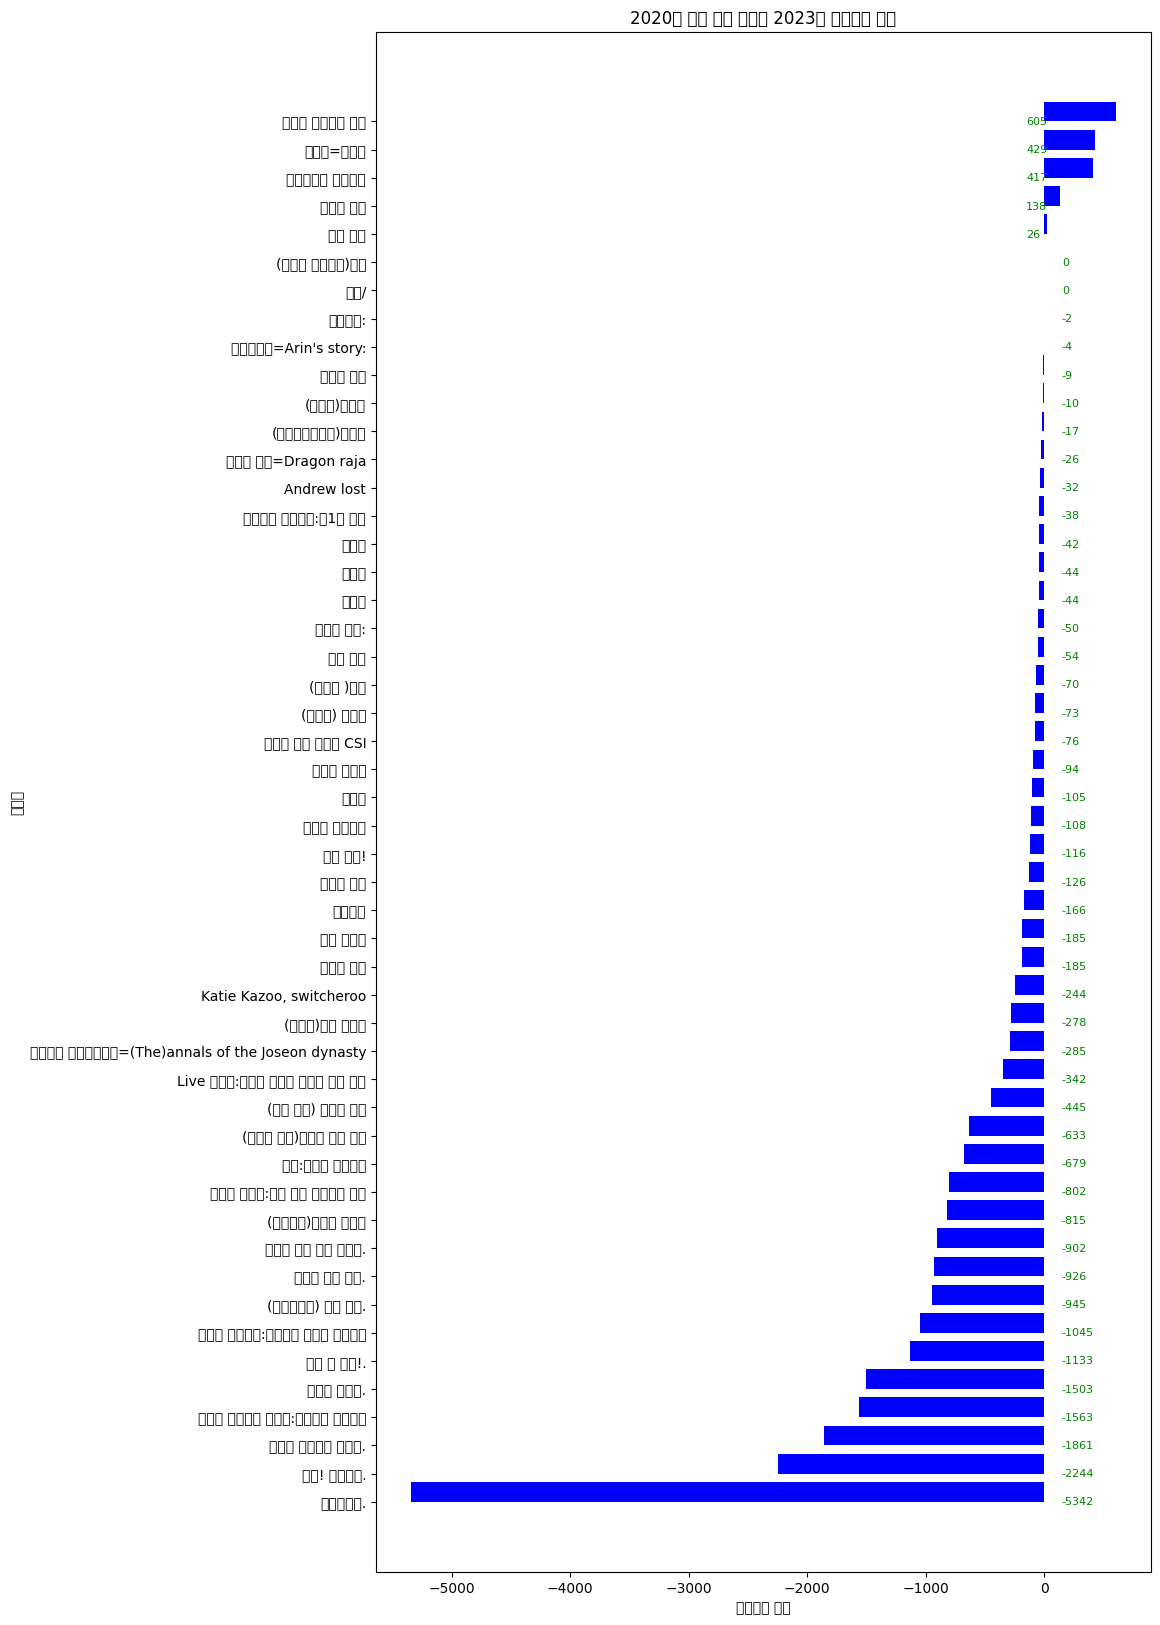

In [136]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


fig, ax = plt.subplots(figsize=(10, 20))
plt.barh(change50['물음표변환도서명'], change50['대출건수증감(23-20)'], height=0.7, align='edge', color='blue')
plt.title('2020년 최다 대출 도서의 2023년 대출건수 증감')
plt.xlabel('대출건수 증감')
plt.ylabel('도서명')

for idx, row in change50.iterrows():
    x_coord = - 150 if row['대출건수증감(23-20)'] > 0 else + 150
    plt.annotate(row['대출건수증감(23-20)'], (x_coord,idx), xytext=(x_coord, idx), fontsize=8, va='center', color='green')

plt.show()

# 6. 위의 통계를 도출하면서 필요한 전처리 (중복 제거, 누락값 처리, 잘못된 값 처리 등)를 강의 내용을 참고하여 수행

### *수행완료*